# Práctica 4a: Manejo del sistema de ficheros en el *shell* de Linux.

## Objetivos

El objetivo de este boletín de prácticas es continuar familiarizando al alumno con la consulta y manipulación del sistema de ficheros a través de la interfaz de línea de comandos, introduciendo el uso de comodines como herramienta clave detrás del potencial del shell a la hora de listar, mover, copiar o borrar ficheros. Además, se pretende que el alumno adquiera soltura en la búsqueda de información en la documentación existente en las páginas del manual de los diferentes comandos. También se introducen conceptos tales como el propietario y grupo de un fichero, así como sus permisos.

<font size="4">  
    <span style="color: red;">No olvides configurar Git para usar tu nombre y apellido(s), y tu dirección de correo electrónico universitario antes de comenzar.
    </span>
</font>

Edita las primeras líneas de la siguiente celda con tu nombre y email y ejecútala para configurar tu entorno Git antes de empezar.

In [ ]:
# Establece tu identidad
git config --global user.name "Nombre Apellido1 [Apellido2]"
git config --global user.email "alumno@um.es"

# Establece el editor por defecto
# para los mensajes de commit
git config --global core.editor "gedit"

<br>
<font size="5">  
    <span style="color: red;"><b>IMPORTANTE:</b><br> Añade este fichero a tu repositorio-bitácora "fc-alumno" <b>ANTES</b> de comenzar a realizar los ejercicios.
    </span>
</font>  
<font size="4">  
    Sigue las instrucciones a continuación.
</font>

Recuerda que para poder registrar tu trabajo en tu bitácora personal de prácticas, debes evitar trabajar en una copia de este *notebook* que no esté bajo control de versiones en Git en tu repositorio. Por ello, **ANTES DE REALIZAR NINGÚN CAMBIO en este fichero asegúrate de COLOCARLO DENTRO DIRECTORIO DE TU REPOSITORIO-BITÁCORA `fc-alumno`** y añadirlo al repositorio:
1. Cierra esta pestaña del navegador sin guardar los cambios.
2. Muévelo desde donde lo hayas descargado del AV (p.ej. `$HOME/Descargas`) al directorio donde tengas tu repositorio (se recomienda `$HOME/fc-alumno`).
3. Añádelo al repositorio:
    * `git add practica4a-ficheros-boletin.ipynb`
    * `git commit -m "Añadiendo el notebook del boletín de la práctica 4a (sin empezar)"`

## Algunas recomendaciones iniciales

### Recomendaciones sobre la nomenclatura de ficheros

- **Espacios en blanco**. Dado que la sintaxis del shell utiliza el espacio en blanco como separador entre los diferentes elementos que componen una orden (nombre del comando, opciones, parámetros), es una costumbre habitual entre los usuarios de Linux no usar espacios en blanco en el nombre de los ficheros o directorios; no es porque no esté permitido sino por comodidad, pues su uso nos obliga bien a entrecomillar el nombre del fichero/directorio o bien a anteponer la barra invertida `\` ante cada espacio en blanco que contenga el nombre
(por ejemplo, `ls mi\ directorio`). Esto es necesario para que el shell no confunda el espacio del nombre del fichero con el separador habitual.
- **Caracteres especiales**. Los caracteres `/|\!?*<>&~()[];#:` también tienen un significado especial en la gramática bash, por lo que se recomienda igualmente evitar su uso a la hora de nombrar ficheros.

In [ ]:
rm -rf /tmp/pruebas-bash
mkdir /tmp/pruebas-bash
cd /tmp/pruebas-bash

In [ ]:
# Creamos un directorio cuyo nombre tiene espacios
mkdir "mi directorio"

In [ ]:
# El espacio tiene un significado especial para el shell... (separador de comandos, opción, argumentos...)
cd mi directorio

In [ ]:
# Podemos anteponer la "contrabarra" para "escapar" del significado especial del espacio
cd mi\ directorio

In [ ]:
touch "nombre>no-recomendable"

In [ ]:
touch "nombre&no-recomendable"

In [ ]:
ls

Fíjate en que los nombres aparecen entrecomillados, ya que contienen caracteres especiales.

In [ ]:
cat nombre&no-recomendable

Al no indicar que queremos que `&` no se interprete como un carácter especial, el shell interpreta que es un separador de órdenes y por tanto que `cat nombre` es una orden y `no-recomendable` es otra orden distinta (la primera se lanza en segundo plano, como veremos en sucesivos boletines).

In [ ]:
cat nombre>no-recomendable

Al no indicar que queremos que `>` no se interprete como un carácter especial, el shell interpreta que es el operador de redirección y por tanto que `cat nombre` es una orden cuya salida queremos redireccionar al fichero `no-recomendable` (veremos en qué consiste la *redirección* en próximos boletines).

In [ ]:
pwd

In [ ]:
cd ..

Por tanto, si tenemos ficheros o directorios con caracteres especiales, siempre debemos entrecomillarlos para pasarlos como argumentos a cualquier comando:

In [ ]:
rm -r "mi directorio"

- **Mayúsculas y minúsculas**: `A != a`. Ten en cuenta siempre que en Linux, los nombres de ficheros `Programa.c` y `programa.c` son distintos.

In [ ]:
# Todos estos nombres de fichero son distintos
touch hola HOLA holA HolA

In [ ]:
ls

- **Uso del carácter . (punto)**. Puede aparecer tantas veces como queramos en el nombre de ficheros y directorios, y su uso suele ser por comodidad o convención, para diferenciar a modo de *extensiones* los ficheros del mismo tipo, por ejemplo, aquellos que serán abiertos con la misma aplicación (p.ej., `documento.pdf`). No obstante, también es perfectamente válido no incluir ningún punto en el nombre de un fichero o directorio (p.ej., `LEEME`). Aquellos ficheros o directorios cuyo nombre comience por el carácter punto se considerarán ocultos y no aparecerían en un listado normal, a menos que usemos la opción `-a` o `--all` del comando `ls`).


In [ ]:
# Creamos un directorio y nos cambiamos al mismo
mkdir ocultos && cd ocultos 

In [ ]:
touch leeme.txt

In [ ]:
touch .fichero_oculto

In [ ]:
ls

Con la opción `-a` (o `--all`) veremos todos los ficheros, incluyendo los que empiezan por punto.

In [ ]:
ls -a

Recuerda que las opciones se pueden combinar en cualquier orden.

In [ ]:
ls -al

### Recomendaciones a la hora de teclear comandos

- **Autocompletado con `TAB`**. Como se vio en anteriores prácticas, la pulsación tecla del tabulador, puede ayudarnos a ahorrar miles de pulsaciones de teclas, al autocompletar los nombres de los ficheros o directorios que pasamos como parámetros a nuestros comandos.

- **Historial de comandos**. Podemos hacer un uso más rápido del intérprete de órdenes haciendo uso de las teclas flecha arriba ↑ o abajo ↓ para navegar por las órdenes que ya hayamos introducido anteriormente y que se guardan en un historial. También podemos buscar en el historial con la combinación `CTRL+R` y tecleando una subcadena de una orden anterior, de forma que pulsando `CTRL+R` de nuevo podemos ir pasando al siguiente resultado de la búsqueda.

- **Copiar y pegar**. Podemos copiar el texto que previamente hayamos seleccionado en el terminal con la combinación `Ctrl+Mayúsculas+C` . Con `Ctrl+Mayúsculas+V` podemos pegar en el terminal lo que hayamos copiado previamente al portapapeles, ya sea desde el terminal o desde cualquier otro programa.
- **Obteniendo ayuda**. Cuanto más se usa el terminal más diestro se es, pero al principio es muy recomendable consultar continuamente el manual y experimentar con órdenes y sus opciones para familiarizarnos. El comando `man orden` muestra la documentación o manual de uso de la orden tecleada, del que se sale pulsando la tecla `q`. Lo habitual es buscar una determinada palabra clave en la documentación, para lo cual se utiliza `/` seguido de la cadena a buscar. Por otro lado, la mayoría de comandos acepta también la opción `--help`, que muestra un resumen sobre su uso así como las opciones más relevantes.

In [ ]:
cd --help

In [ ]:
man ls

## Usuarios y grupos. Permisos.

Linux es un SO multiusuario, lo que significa que más de un usuario puede trabajar en el sistema de forma simultánea con otros, ejecutando una o más tareas a la vez. Para que múltiples usuarios puedan hacer uso del sistema de una forma segura y ordenada es necesario que el sistema disponga de mecanismos para proteger y limitar el acceso
a los datos de cada usuario, así como proteger y asegurar el correcto funcionamiento del propio sistema.

### Tipos de usuarios

1. **Usuarios normales**: Son individuos particulares que pueden acceder al sistema para hacer uso de los recursos que ofrece el mismo, sin disponer de los privilegios necesarios para administrarlo. Como indicador el prompt utiliza para ellos por defecto el símbolo dólar.


2. **Usuarios de sistema**: Son usuarios especiales vinculados a ciertas tareas que debe realizar el sistema operativo. No están vinculados a personas, ya que este tipo de usuarios no pueden ingresar al sistema con un login normal. Ejemplos: `mail`, `bin`, `kvm`, etc. También se les conoce como usuarios sin login.


3. **Usuario `root`, o superusuario**: Todo sistema Linux cuenta con un superusuario, que tiene los máximos privilegios. Dichos privilegios le permitirán efectuar cualquier operación sobre el sistema (incluida su destrucción). Su existencia es imprescindible ya que se encarga de adminstrar su funcionamiento, incluyendo los grupos, usuarios, instalación de software, etc. Debido a su omnipotencia, al entrar como superusuario el prompt nos avisa de ello utilizando el símbolo almohadilla `#`.

Un usuario puede pertenecer a varios grupos, y el superusuario es el responsable de organizar la distribución de usuarios por grupos.


A continuación se expone la lista de órdenes más habituales relacionadas con lo visto en este apartado:

- `whoami` : Muestra nuestro nombre de usuario.
- `who` : Muestra los usuarios actualmente conectados al sistema, con su hora de inicio de sesión, y la máquina desde la que accedió al equipo.
- `su`: Cambia de usuario (*switch user*). Por defecto, cambia de usuario normal a superusuario (o root). El prompt acaba con el carácter # en lugar del carácter dólar para advertírnoslo. Si se especifica como parámetro un usuario, se cambia a ese usuario. En cualquier caso, hay que indicar la contraseña del usuario al que se desea cambiar.
- `sudo orden`: Ejecuta el comando orden como superususario, aún estando conectados como usuario normal (por supuesto, y al igual que el comando anterior, exige contraseña).
- `exit` : Termina la sesión del usuario actual.

In [ ]:
whoami

In [ ]:
who

### Grupos

Para poder administrar los permisos de acceso al sistema de ficheros de una forma más flexible, Linux permite la organización de usuarios en grupos, de forma que cada fichero o directorio, además de tener un usuario propietario, siempre pertenece a un determinado grupo. Los grupos, por tanto, permiten otorgar una serie de privilegios a un conjunto de usuarios sin tener que dárselos de forma individual a cada uno de ellos. Así pues, los usuarios de un sistema Linux se organizan en grupos, de forma que todos los miembros del mismo grupo disponen de los mismos privilegios para poder acceder a ficheros y servicios del sistema. 

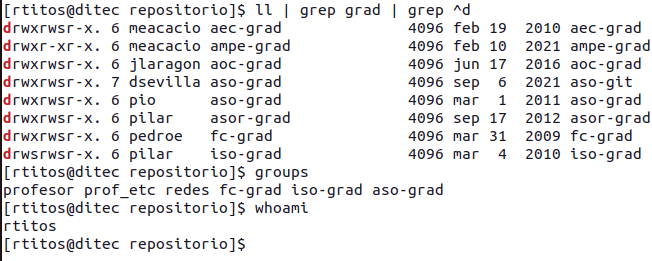

Con el comando `groups`: podemos ver a qué grupos pertenecemos.

In [ ]:
groups

### Superusuario

Una buena razón para aprender los fundamentos de la línea de comandos es que las instrucciones que solemos encontrar en la red suelen favorecer el uso de comandos del shell en lugar de una interfaz gráfica. Cuando esas instrucciones requieran cambios en tu máquina que vayan más allá de la modificación de unos pocos ficheros en tu
directorio personal, inevitablemente te encontrarás con comandos que deben ser ejecutados como administrador de la máquina (o superusuario en la jerga de Unix). Antes de que empieces a ejecutar comandos arbitrarios que encuentres en algún rincón oscuro de Internet, vale la pena entender las implicaciones de ejecutar como administrador, para que puedas valorar mejor si son seguras de ejecutar o no.


El superusuario es un usuario con superpoderes, pues **puede modificar o eliminar cualquier fichero en cualquier directorio del sistema, independientemente de quién sea su propietario**; `root` puede reescribir las reglas del cortafuegos o iniciar servicios de red que podrían abrir la máquina a un ataque; o apagar la máquina aunque haya otras personas utilizándola. En resumen, el usuario `root` puede hacer prácticamente cualquier cosa, saltándose fácilmente las protecciones que se suelen poner en marcha para evitar que los usuarios se pasen de la raya. Por supuesto, una persona conectada como root es tan capaz de cometer errores como cualquier otra. Los anales de la historia de la informática están llenos de relatos en los que un comando mal escrito borra todo el sistema de ficheros o mata un servidor vital. Además, existe la posibilidad de un ataque malicioso: si un usuario se conecta como root y abandona su escritorio, no es demasiado difícil que un colega descontento se meta en su máquina y cause estragos.

Para tratar de minimizar la cantidad de tiempo que se pasa conectado como root, muchas distribuciones de Linux comenzaron a fomentar el uso del comando `su` (*switch user*), que permite cambiar a otro usuario en la máquina sin tener que salir y entrar de nuevo. Cuando se utiliza sin parámetros, asume que quieres cambiar al usuario `root`, pero puedes pasarle un nombre de usuario para cambiar a una cuenta de usuario específica.

En muchas distribuciones de Linux, como Ubuntu, la cuenta de `root` está deshabilitada por completo para no permitir sesiones de terminal de larga duración con poderes peligrosos. En su lugar, se requiere que el usuario solicite específicamente los derechos de superusuario en cada comando mediante `sudo` (que viene de “cambiar de usuario y hacer este comando”). `sudo` se utiliza antepuesto a un comando que debe ejecutarse con privilegios de superusuario. Por ejemplo: 
```bash
$ sudo chown newowner FILE
```

Se utiliza un fichero de configuración para definir qué usuarios pueden utilizar `sudo`, y qué comandos pueden ejecutar. Cuando se ejecuta, al usuario se le pide su propia contraseña, que se almacena en la memoria durante un período de tiempo (por defecto 15 minutos), por lo que si necesita ejecutar varios comandos de nivel de superusuario no se le pide continuamente que la escriba. En un sistema Ubuntu, el primer usuario creado cuando se instala el sistema se
considera el superusuario.

## Consulta y manipulación del sistema de ficheros

Los distintos entornos de escritorio que podemos encontrar en cualquier distribución de Linux actual cuentan con exploradores de ficheros que permiten interactuar con el sistema de ficheros mediante una interfaz de usuario gráfica (GUI) basada en ventanas y botones que nos permiten interactuar mediante el ratón. Si bien la interfaz que nos ofrece el shell no resulta tan intuitiva, merece la pena aprender los comandos de manejo del sistema de ficheros ya que estos nos ofrecen muchas más posibilidades de listado, búsqueda y manipulación, como veremos en este boletín.

A la hora de aprender a utilizar los principales comandos de manipulación del sistema de ficheros, resulta fundamental tener presente los conceptos de rutas absolutas y relativas vistos en una práctica anterior, ya que esto nos permite explotar una poderosa propiedad de la línea de comandos: es posible operar con ficheros y directorios en ubicaciones totalmente diferentes sin importar en qué parte del sistema de ficheros nos encontremos.


#### ¿Qué hay por aquí?

Como vimos en una práctica anterior, el comando `ls` nos permite obtener diversa información sobre el contenido del sistema de ficheros. Si lo ejecutamos sin parámetros, este comando lista en formato “corto” las entradas del directorio de trabajo actual; en caso de que se le pasen como parámetro rutas a ficheros o directorios, `ls` mostrará el contenido de dichos directorios (o información sobre ficheros). Aunque existen muchas opciones a la hora de
elegir qué información muestra ls y cómo lo hace (prueba a verlas con `man ls`), sin duda la opción más utilizada es `ls -l` (“ele”), que nos ofrece un “listado largo” con información detallada sobre cada entrada (fichero o directorio).


Otras opciones habituales son: 
- `-a` (o `--all`), que lista todos los ficheros incluyendo los ficheros ocultos (cuyo nombre comienza por el carácter punto .).
- `-R` (o `--recursive`), que lista recursivamente mostrando el contenido de todos los subdirectorios, a cualquier profundidad.
- `-S`, que lista en orden de tamaño
- `-t` , que lista en orden de fecha y hora de la última modificación.

Como muestra la siguiente figura, en el listado en formato largo que obtenemos con `ls -l`, cada línea se corresponde con una entrada del directorio (fichero o directorio). 

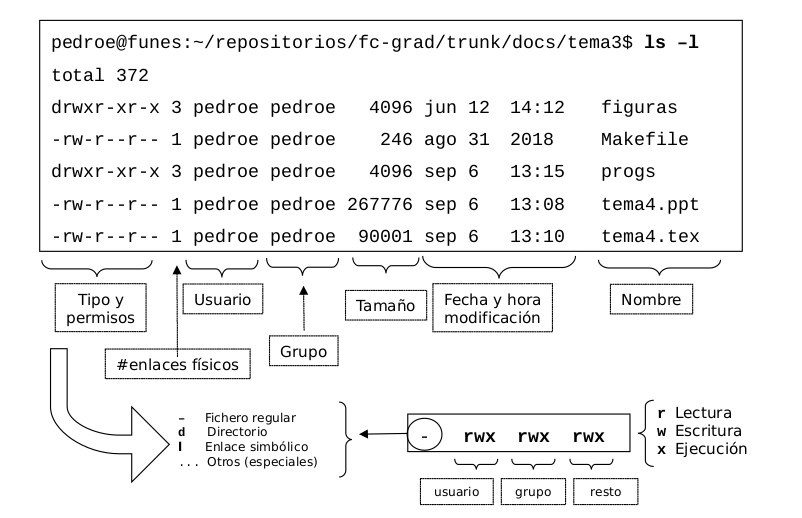

Si la línea empieza por `d`, se trata de un directorio, si empieza por un guión (-) es un fichero (NOTA: hay más tipos de ficheros  por tanto más letras, pero quedan fuera del alcance de esta prácticas; continúa con los permisos; el número de enlaces físicos que tiene esa entrada; el usuario propietario del fichero (normalmente, el que lo creó); el grupo al que pertenece el fichero; el tamaño del fichero o directorio; su fecha y hora de última modificación y su nombre.


Los permisos disponibles para cada entrada son 9, agrupados de 3 en 3. Los 3 grupos se refieren, respectivamente, al propietario del fichero, a los usuarios pertenecientes al grupo del fichero y por último al resto de usuarios del sistema. Para cada uno de esos grupos se definen 3 permisos, llamados de lectura (r), escritura (w) y ejecución (x).
Volveremos sobre los permisos en el siguiente boletín.


En el caso del tamaño de los directorios, cabe destacar que se refiere al tamaño que ocupa la lista de entradas (ficheros o directorios) que contiene, y no el tamaño de su contenido. De hecho, el tamaño de los directorios suele ser habitualmente 4 KiB, aunque puede crecer de 4 en 4 KiB dependiendo del número de entradas que contenga.

In [ ]:
mkdir -p /tmp/pruebas-bash/permisos

In [ ]:
cd /tmp/pruebas-bash/permisos

In [ ]:
# Ejecuta esta celda para crear algunos ficheros con distintos permisos

echo "Hola, mundo" > hello
echo '#!/bin/bash' > listadolargorecientes
echo 'ls -lt' >> listadolargorecientes
rm -f ficherosololectura
echo '''¡¡Modifícame, si puedes!!' > ficherosololectura
chmod a-w ficherosololectura
chmod a+x listadolargorecientes
ls -l /usr/bin > listadoprogramas
rm -rf directorio1 directorio2
mkdir -p directorio0 directorio1 directorio2
for i in `seq 0 128` ; do touch directorio2/un_fichero_vacio_con_nombre_muy_largo_$i ; done
for i in `seq 0 128` ; do touch directorio1/$i ; done

Como vemos a continuación, el shell suele colorear los directorios (azul), los ficheros ejecutables (verde) y otros ficheros regulares (tales como los archivadores `.zip`, en rojo) mientras que deja en el color por defecto los demás ficheros regulares.

In [ ]:
ls -l

**Para ejecutar un fichero, necesitamos anteponer la ruta exacta al mismo**, ya sea relativa o absoluta. Por ejemplo, para ejecutar el *shell script* `listadolargorecientes` que está en el directorio actual, teclearíamos:

In [ ]:
ls -l listadolargorecientes

In [ ]:
cat listadolargorecientes

In [ ]:
./listadolargorecientes

Los directorios, ya estén vacíos o tengan un número relativamente pequeño de ficheros, ocupan 4KiB. Una vez que **la lista** de ficheros que contienen se hace más larga, el directorio va creciendo de tamaño para albergar dicha lista. Recuerda que un directorio es simplemente una lista de ficheros, y que el **tamaño de un directorio NO tiene nada que ver con el tamaño de los ficheros que contiene**, sino con el nombre de dichos ficheros y su número. Por ejemplo, el directorio  `directorio2` creado anteriormente contiene únicamente ficheros vacíos. Dicha *lista* ocupa 12KiB a pesar de que los ficheros que hay en él no tienen contenido alguno.

In [ ]:
ls -l directorio2

Fíjate que `directorio1` contiene el mismo número de ficheros que `directorio2` (128 ficheros), y sin embargo su tamaño es igual al de `directorio0` (que está vacío). Como ves, el tamaño del directorio depende de los nombres de los ficheros que contiene, pero no de su contenido.

In [ ]:
ls directorio1

In [ ]:
ls -l

Podemos comprobar que tenemos permisos de lectura sobre un fichero mostrando su contenido con `cat`:

In [ ]:
cat hello

Podemos comprobar que tenemos permisos de escritura sobre un fichero añadiendo una línea al final del mismo de esta forma:

In [ ]:
echo "Hello, world, again!"

In [ ]:
# echo es un comando que imprime por pantalla lo que le pasemos
# >> Es un operador de redirección de la salida (añade al final)
# Entenderemos este comando mejor en sucesivos boletines
echo "Hello, world, again!" >> hello

In [ ]:
cat hello

Sin embargo, si carecemos de permisos de escritura, la misma operación fallará:

In [ ]:
ls -l ficherosololectura

In [ ]:
echo "Hello, world, again!" >> ficherosololectura

Algunas veces nos interesará hacer un listado *recursivo* de un directorio, que muestre su contenido y luego haga un listado recursivo de cada uno de los subdirectorios que contiene, y así sucesivamente, para mostrar todos los ficheros situados a cualquier profundidad.

In [ ]:
ls -R

### Uso de comodines

Una de las capacidades destacadas que ofrece cualquier shell es la posibilidad de utilizar caracteres especiales, llamados comodines, para manejar muchos ficheros de nombre similar a la vez a la hora de pasar parámetros a los diferentes comandos. Podemos combinar comodines para obtener listados múltiples acotados, sin necesidad de teclear
una a una todas las entradas deseadas. Los comodines pueden usarse en cualquier lugar de la línea de comandos, aunque lo más habitual es emplearlos en los listados a realizar con el comando ls visto en el apartado anterior (como en el comando `ls -l *.c *.h`, por ejemplo), o bien con comandos para copiar, mover o borrar archivos, que veremos un poco más adelante.
El repertorio completo de comodines que utilizaremos es el siguiente:
- `*` : Significa cero o más caracteres cualesquiera.
- `?` : Un carácter cualquiera.
- `[a-z]` : Cualquier carácter del rango indicado.
- `[!b-d]` : Cualquier carácter que no esté en el rango indicado.
- `{nom1,nom2,...}` : Cualquier secuencia de caracteres o nombres de la lista.


Algunos ejemplos:
- `*.{c,h}` : Recogería nombres como `pepe.c`, `f1.c`, `hola.h`, `antonio.h`, ...
- `{fi1,fi2}.[a-c]` : Recogería los nombres `fi1.a`, `fi2.a`, `fi1.b`, `fi2.b`, `fi1.c`, `fi2.c`.
- `*.?` : Recogería todos los ficheros con extensión de un carácter, como `f1.a`, `hola.c`, `adios.txt.c`, ...
- `*.[!c]` : Recogería todos los ficheros con extensión de un carácter que no sea `c`, como `pepe.h`, `f1.a`, o `f2.z`, pero no `fichero`, `hola.doc` o `antonio.c`.

Naturalmente, los comodines pueden también formar parte de una ruta arbitrariamente larga, como en el comando
`ls -l ../../dir/p*.txt`, por ejemplo.

#### <span style="color: blue;">EJERCICIO</span>

Ejecuta las siguientes celdas para generar un directorio con ficheros de prueba.

In [ ]:
rm -rf /tmp/pruebas-bash/comodines
mkdir -p /tmp/pruebas-bash/comodines
cd /tmp/pruebas-bash/comodines

In [ ]:
# Ejecuta esta celda para crear algunos ficheros con distintos nombres
for i in `seq 5 15` ; do touch file_$i.c ; done 
for i in `seq 8 12` ; do touch fichero_$i.c ; done
for i in `seq 0 5` ; do touch archivo_$i.c ; done
for i in `seq 0 5` ; do touch archivo_$i.cpp fichero_$i.cpp; done
for i in `seq 0 5` ; do touch file_$i.h ; done
for i in `seq 0 10` ; do touch $i.txt ; done
touch test1.txt readme hello.py alfiletero.txt file_.c file_a.c file_ab.c
cp /usr/bin/fi* .

In [ ]:
ls

 Ahora, a la vista del contenido del directorio actual, observa la salida de cada comando que usa comodines, y escribe el comando adecuado en las celdas vacías:

In [ ]:
# Lista ficheros que empiecen por "file"
# Recuerda: * equivale a *CERO* o más caracteres
ls file*

In [ ]:
# Lista los ficheros que terminen con el carácter "h"


In [ ]:
# Lista los ficheros que contengan la cadena ".c"


In [ ]:
# Lista los ficheros que contengan las cadenas "fi" y "ro"


In [ ]:
ls file_?.c

¿Por qué no se muestra `file_10.c`?

RESPUESTA:

¿Por qué se muestra `file_a.c`?

RESPUESTA:

In [ ]:
# Muestra únicamente los ficheros llamados "file_" seguidos #
# de exactamente dos caracteres cualquiera, y acabados en ".c"


In [ ]:
# Muestra únicamente los ficheros llamados "file_" seguidos #
# de exactamente dos caracters numéricos, y acabados en ".c"


In [ ]:
ls file_*.c

¿Por qué se muestra `file_.c`?

RESPUESTA:

In [ ]:
# Lista los ficheros que empiecen por una letra cualquiera seguida de "i", 
# una cadena cualquiera y acaben con la letra p


In [ ]:
# Lista los ficheros que empiecen por "file_5" y acaben por una letra cualquiera
ls file_5*

In [ ]:
# Recuerda: * equivale a *CERO* o más caracteres
ls file*.c

In [ ]:
# Trata de listar los ficheros cuyo nombre empiece con "file" seguido de un carácter exactamente. ¿Hay alguno?
ls file?

RESPUESTA: 

In [ ]:
# Lista los ficheros que acaban en .cpp


In [ ]:
# Lista los ficheros que acaban en .cpp o en .h
ls *.{cpp,h}

In [ ]:
# Lista los ficheros que empiezan por "file" o "fichero" seguidos de "_8.c"


In [ ]:
# Lista los ficheros que empiezan por "file" o "fichero" seguidos de dos caracteres cualquiera y luego ".c"


In [ ]:
# Lista los ficheros que contienen las cadenas "fi", "chi" o "es", y acaban en "txt" o en "cpp"


¿Por qué crees que se muestran algunos mensajes de error en el comando anterior?

RESPUESTA:

In [ ]:
# Lista los ficheros que empiezan un número del 0 al 5
ls [0-5]*

In [ ]:
# Lista los ficheros que contienen la cadena "he", "re" o "le"
ls *[hlr]e*

In [ ]:
# Lista los ficheros que empiezan por a o por f, y acaban por _3.c, _4.c, _5.c, _6.c, _7.c


In [ ]:
# Lista los ficheros que empiezan por cualquier letra de la m a la z


In [ ]:
# Lista los ficheros que empiezan por f o cualquier letra de la m a la z, y acaban por d o por t.


In [ ]:
# Lista los ficheros que NO empiezan por f y acaban en .c
ls [!f]*.c

In [ ]:
# Lista los ficheros que cuya primera letra sea la f o la h,
# la segunda sea la i o la e, y la tercera sea la l o la n,
# y acaben por cualquier cadena


In [ ]:
# Lista los ficheros que empiecen por "file" o "hello" y acaben con un carácter de la g a la z


Las rutas que acabamos de emplear con comodines son todas rutas relativas al directorio actual (los ficheros que manejamos están en dicho directorio, por eso no hemos antepuesto nada al nombre del fichero). No obstante, resulta posible utilizar comodines para cualquier ruta, ya sea absoluta o relativa, como podemos ver a continuación:

In [ ]:
ls ../[Hh]*

In [ ]:
cd /tmp/pruebas-bash

In [ ]:
ls comodines/fi*.h */directorio?/*10

In [ ]:
ls hol? */*.cpp

In [ ]:
# Lista los ficheros cuyo nombre acabe en ".txt" que estén situados 
# en los subdirectorios inmediatos cuyo nombre acabe en "es" o en "os"


In [ ]:
# Lista los ficheros en cualquier subdirectorio inmediato del directorio actual, 
# cuyo nombre empiece por "punto" y tenga al menos 3 caracteres


### ¿Qué hay dentro?

El terminal nos permite también mostrar el contenido de los ficheros de texto sin necesidad de abrir un editor. Los comandos más útiles para ello son:

- `cat fichero`: Muestra el contenido del fichero, de golpe, en el terminal.
- `less fichero`: Muestra el contenido del fichero, con posibilidad de scroll bidireccional en el terminal, y búsqueda de palabras (con `/palabra` ). Para terminar de visualizarlo hay que pulsar la tecla `q`.
- `hexdump -C archivo`: Vuelca el archivo en formato hexadecimal en el terminal. Éste comando es interesante porque permite también inspeccionar archivos binarios genéricos (no necesariamente de texto), por el terminal, muy al estilo del programa `okteta`.

<span style="color: red;"><B>RECUERDA</B>: ¡NO DEBES EJECUTAR "less" EN UN JUPYTER NOTEBOOK!</span> Dicho comando necesita leer su entrada de teclado (teclas para subir/bajar página, salir del visor, etc.), lo cual no es posible desde dentro de Jupyter. En caso de hacerlo, debes reiniciar el kernel desde el menú superior: *Kernel->Restart*

In [ ]:
mkdir -p /tmp/pruebas-bash/visores
cd /tmp/pruebas-bash/visores
echo "Hola, mundo" > hello

In [ ]:
cat hello

In [ ]:
hexdump -C hello

In [ ]:
# Prueba a ejecutar esta celda y verás cómo se queda indefinidamente 
# en ejecución [*]... (el kernel no termina de ejecutarla). A partir
# de aquí ya no puedes ejecutar ninguna otra celda... Reinicia el kernel
less hello

### Crear, copiar, mover y borrar ficheros y directorios

A continuación se muestran los comandos más comunes para la creación (`touch`), copiado (`cp`), traslado (`mv`) y borrado (`rm`) de ficheros:
- `touch nombre_fichero` : Crea un nuevo fichero llamado `nombre_fichero`, vacío, o si ya existía le cambia la fecha y hora de modificación a la actual sin modificar su contenido.
- `cp fich_origen_1 [fich_origen_2 ...] fich_destino|dir_destino` : Copia un fichero a otra ubicación, ya sea manteniendo su nombre o con uno nuevo; o bien copia varios ficheros a un directorio, en este caso manteniendo sus nombres originales. También puede copiar directorios, incluyendo su contenido. Para ilustrar su uso, veamos varios ejemplos de utilización del comando `cp`. En los siguientes ejemplos, el directorio de trabajo actual contiene un directorio llamado `Escritorio`; por su parte, `/etc/hosts` y `/etc/hostname` son ficheros regulares, mientras que `/etc/init.d` es un directorio.
    * `cp /etc/hosts Escritorio` : Copia el fichero /etc/hosts al directorio Escritorio (que está en el directorio actual), manteniendo su nombre. Si el fichero `Escritorio/hosts` ya existe,sobreescribe su contenido.
    * `cp /etc/hosts Escritorio/hosts.backup` : Copia el fichero /etc/hosts al directorio `Escritorio`, con el nombre `hosts.backup`. Si ya existe un fichero con ese nombre, sobreescribe su contenido.
    * `cp /etc/hosts escritorio/hosts.backup `: Error, el directorio destino escritorio no existe.
    * `cp /etc/hosts /etc/hostname Escritorio `: Copia los ficheros hosts y hostname del directorio origen `/etc` al directorio destino `Escritorio` , manteniendo sus respectivos nombres.
    * `cp /etc/hosts /etc/hostname Escritorio/hosts `: Error, el destino hosts debe ser un directorio ya que hay más de un fichero origen.
    * `cp /etc/init.d /etc/hosts Escritorio` : Se omite la copia del directorio `init.d`, sin embargo sí se copia el fichero hosts al directorio destino.
    * `cp -r /etc/init.d Escritorio` : Copia recursivamente todo el contenido del subdirectorio `init.d` al directorio destino.
- `mv fichero_origen_1|dir_origen_1 [...] fichero_destino|dir_destino`: El comando mv es similar al comando cp, pero borra el(los) fichero(s) y/o directorio(s) de origen tras copiarlos. Podemos también usarlo para cambiar el nombre de un fichero o subdirectorio si tanto el origen como el
destino están ubicados en el mismo directorio.
- `rm fichero_1|directorio_1 ... `: El comando `rm` sirve para borrar ficheros o directorios.

<span style="color: red;"><B>ADVERTENCIA IMPORTANTE</B></span>. A diferencia de las interfaces gráficas, `rm` **no mueve los archivos a una carpeta llamada “Papelera” o similar**. En su lugar, los borra total, absoluta e irrevocablemente. Debes tener mucho cuidado con los parámetros que utilizas con `rm` para asegurarte de que sólo estás borrando el/los archivo/s que pretendes.

Debes tener especial cuidado cuando utilices comodines, ya que es fácil borrar accidentalmente más archivos de los que pretendías. Un carácter de espacio erróneo en tu comando puede cambiarlo por completo: 
```bash
$ rm t*
```
significa eliminar todos los archivos que empiezan por "t", mientras que este comando:

```bash
$ rm t *
```
significa eliminar el archivo `t` así como cualquier archivo cuyo nombre esté formado por cero o más caracteres, *¡lo que sería todo en el directorio!* Si no estás seguro, utilice la opción `-i` (interactiva) de `rm`, que te pedirá que confirmes la eliminación de cada archivo; introduzca S para eliminarlo, N para conservarlo y pulse `Ctrl-C` para detener la operación por completo.

En particular, **debes tener muchísimo cuidado al usar `rm -rf`** ya que esto borra de forma recursiva (-r), y sin confirmación (-f), los parámetros que se le pasan como parámetros (usualmente directorios).

#### Manipulando directorios

En relación a la creación, borrado y copia de directorios, los comandos más relevantes son:
- `mkdir directorio` : Crea un directorio vacío en la ruta designada o en el directorio actual.
- `rmdir directorio` : Borra el directorio indicado, siempre que esté vacío. Si no, hay que borrar primero todas sus entradas, o bien simplemente usar el comando rm con la opción -r, como se indicó anteriormente.
- `cp -r directorio_origen directorio_destino` : Copia el directorio origen en el directorio destino. También puede hacerse usando el comodín `*` dentro del directorio origen, pero para ello el directorio destino debe haber sido creado previamente.

#### <span style="color: blue;">EJERCICIO</span>

Vamos a utilizar los ficheros de prueba que hemos generado anteriormente.

In [ ]:
# Creamos una copia de respaldo, por si necesitamos repetir algún paso
cp -r /tmp/pruebas-bash/ /tmp/pruebas-bash-backup

In [ ]:
# Ejecuta esta celda si quieres repetir este ejercicio desde el principio
rm -rf /tmp/pruebas-bash/
cp -r /tmp/pruebas-bash-backup/ /tmp/pruebas-bash/
cd /tmp/pruebas-bash/

In [ ]:
ls

In [ ]:
# Crea una copia del fichero "hola" en el mismo directorio, que se llame "hello".


In [ ]:
# Haz un listado largo del directorio actual


¿Qué tamaño tiene el fichero creado?

RESPUESTA: 

In [ ]:
# Copia el fichero "hello" que hay en "permisos" al directorio actual


In [ ]:
# Haz un listado largo del directorio actual


¿Qué tamaño tiene ahora el fichero `hello`?

RESPUESTA:

In [ ]:
# Muestra el contenido del fichero hello


¿Qué ha ocurrido con el fichero `hello` que era copia de `hola`?

RESPUESTA: 

In [ ]:
# Crea una copia del fichero "hello" (situado en "permisos"),
# llamada "hello2"


In [ ]:
# Renombra el fichero "HOLA", para que pase a llamarse "empty"


In [ ]:
# Haz un listado del directorio actual


Observa los siguientes dos comandos, y luego ejecútalos. ¿Por qué el primero funciona y el segundo falla?

In [ ]:
cp hello hello2

In [ ]:
cp hello hello2 hello3

¿Qué hace el primer comando?

RESPUESTA: 

¿Por qué falla el segundo comando?

RESPUESTA: 

In [ ]:
# Crea un directorio llamado "saludo"


In [ ]:
# Copia los ficheros "hello" y "hello2" al directorio "saludo"


In [ ]:
ls saludo

In [ ]:
# Mueve el directorio "saludo" al directorio "comodines"


In [ ]:
ls comodines

In [ ]:
ls

In [ ]:
ls permisos

In [ ]:
# Copia el fichero "ficherosololectura" (situado en "permisos") 
# al directorio actual, de forma que la copia se llame "readonly"


In [ ]:
# Copia los ficheros que empiecen por "l" situados en "permisos", al directorio "saludo"


In [ ]:
ls saludo

In [ ]:
# Copia los directorios "ocultos" y "visores" al directorio "saludo" (PISTA: opción -r)


In [ ]:
ls saludo

In [ ]:
# Copia los fichero hola al directorio "saludo"


In [ ]:
ls

In [ ]:
# Copia los ficheros que empiezan por h al directorio "saludo"


In [ ]:
# Mueve los ficheros que empiezan por H al directorio "saludo"


In [ ]:
# Cambia el nombre del directorio "saludo" para que pase a llamarse "greetings"


In [ ]:
ls

In [ ]:
# Mueve el directorio "greetings" al directorio "ocultos", de forma que ahora se llame ".diroculto"


In [ ]:
# Borra los ficheros cuyo nombre tenga 4 letras, empiece por "hol" y acabe por a o A (usa comodines)


In [ ]:
# Borra todos los ficheros que hay en el directorio "visores"


In [ ]:
# Borra el directorio visores

In [ ]:
# Borra los ficheros del directorio "directorio1" (situado dentro de "permisos")
# cuyo nombre tenga tres caracteres cualquiera


In [ ]:
ls permisos/directorio1

In [ ]:
# Borra los ficheros del directorio "directorio1" (situado dentro de "permisos")
# cuyo nombre sea un carácter numérico


In [ ]:
ls permisos/directorio1

In [ ]:
# Trata de borrar el directorio "directorio1" (situado dentro de "permisos") con el comando de borrar directorio


¿Por qué no puedes borrar el directorio?

RESPUESTA:

In [ ]:
# Borra *recursivamente* el directorio "directorio1" (situado dentro de "permisos") 


In [ ]:
# Muestra el contenido del directorio "directorio0" que hay en "permisos"


In [ ]:
# Mueve los ficheros que acaban en "txt" del directorio "comodines" al directorio "directorio1"
